In [174]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-by/Test.xlsx
/kaggle/input/train-by/Train.xlsx


In [175]:
import numpy  as np
import pandas as pd

In [176]:
df = pd.read_excel('/kaggle/input/train-by/Train.xlsx',index_col=0, comment='#')
df_clean = df 

In [177]:
pel_class = np.unique(df_clean['CLASS'])
pel_class

array([1, 2, 3])

In [178]:
pel_value = [sum(df_clean['CLASS']==pel_class[0]),
             sum(df_clean['CLASS']==pel_class[1]),
             sum(df_clean['CLASS']==pel_class[2])]
pel_value

[134, 86, 61]

In [179]:
df_clean = df_clean.dropna(0,'any')
y = df_clean['CLASS'].values
X = df_clean.drop(['CLASS'],axis = 1).values

In [180]:
np.unique(pel_value)

array([ 61,  86, 134])

In [181]:
X = np.array(X)
y = np.array(y)

In [182]:
X.shape

(280, 77)

In [183]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
X, y = sm.fit_resample(X, y)

In [184]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2
transformer = GenericUnivariateSelect(chi2, mode='fpr', param=20)
X = transformer.fit_transform(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X , Xt,y,yt = train_test_split(X,y,test_size=0.15,random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X_train_norm = scaler.transform(X)
X_test_norm = scaler.transform(Xt)

# Model

# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params = {
    'C' : [1,2,4,8,16,32], # High C = Overfitting
    'gamma' : [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32] # High gamma = Overfitting
}
clf = GridSearchCV(SVC(),params, cv=10)
clf.fit(X_train_norm, y)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

In [ ]:
df_test = pd.read_excel('/kaggle/input/test-by/Test.xlsx',index_col=0, comment='#')



In [ ]:
yt = df_test['CLASS'].values
Xt = df_test.drop(['CLASS'],axis = 1).values

In [ ]:
X_test_norm = scaler.transform(Xt)

In [ ]:
Xt.shape

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
target_names = ['1', '2','3']
print("Test accuracy : "+str(sum(yt == y_predict)/len(yt)*100))

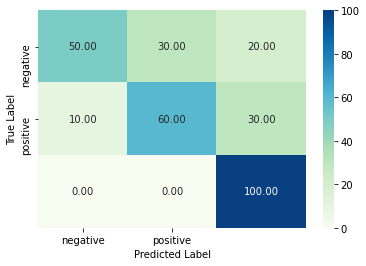

In [193]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(yt,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators' : [10,50,100,200,500],
    'min_samples_leaf' : [1,2,4,8,16,32],
    'max_features' : ['sqrt',0.5,0.8],
    'criterion' : ['gini','entropy']
}
clf = GridSearchCV(RandomForestClassifier(random_state=0),params, cv = 10)
clf.fit(X_train_norm, y)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(yt == y_predict)/len(yt)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
print(classification_report(y_test, y_predict, target_names=target_names))

# [](http://)XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators' : [10,50,100,200],
    'max_depth' : [2, 4, 8],
    'learning_rate' : [0.001, 0.01, 0.1],
    'subsample' : [0.5,0.8, 1],
    'colsample_bytree' : [0.5, 0.8, 1]    
}
clf = GridSearchCV(xgb.XGBClassifier(random_state=0, objective='binary:logistic',n_jobs=-1),params, cv = 10)
clf.fit(X_train_norm, yt)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(yt == y_predict)/len(yt)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['1', '2','3']
C = confusion_matrix(yt,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
print(classification_report(y_test, y_predict, target_names=target_names))